<a href="https://colab.research.google.com/github/nedimazar/SM-A3/blob/main/SubjectivityMining_Assignment3_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras import layers, losses, regularizers, preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_olid_data = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-train-small.csv")
train_hasoc_data = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/hasoc-train.csv")

**OLID DATASET**

In [4]:
test_olid_data = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-test.csv")

train_olid_data.reset_index(drop=True, inplace=True)
test_olid_data.reset_index(drop=True, inplace=True)

In [5]:
X_train_olid, X_valid_olid, y_train_olid, y_valid_olid = train_test_split(train_olid_data['text'].tolist(),
                                                      train_olid_data['labels'].tolist(),
                                                      test_size=0.2,
                                                      stratify=train_olid_data['labels'].tolist(),
                                                      random_state=0)

In [6]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train_olid)

In [7]:
X_train_olid = np.array(tokenizer.texts_to_sequences(X_train_olid))
X_valid_olid = np.array(tokenizer.texts_to_sequences(X_valid_olid))
X_test = np.array(tokenizer.texts_to_sequences(test_olid_data['text'].tolist()))

maxlen = 50
X_train_olid = pad_sequences(X_train_olid, padding='post', maxlen=maxlen)
X_valid_olid = pad_sequences(X_valid_olid, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

train_olid_labels = np.asarray(y_train_olid)
valid_olid_labels = np.asarray(y_valid_olid)
test_labels = np.asarray(test_olid_data['labels'].tolist())

print('Train data len:'+str(len(X_train_olid)))
print('Class distribution:'+str(Counter(train_olid_labels)))

print('Validation data len:'+str(len(X_valid_olid)))
print('Class distribution:'+str(Counter(valid_olid_labels)))

print('Test data len:'+str(len(X_test)))
print('Class distribution:'+str(Counter(test_labels)))

train_olid_ds = tf.data.Dataset.from_tensor_slices((X_train_olid, train_olid_labels))
valid_olid_ds = tf.data.Dataset.from_tensor_slices((X_valid_olid, valid_olid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

Train data len:4681
Class distribution:Counter({0: 2872, 1: 1809})
Validation data len:1171
Class distribution:Counter({0: 719, 1: 452})
Test data len:860
Class distribution:Counter({0: 620, 1: 240})


In [8]:
count = 0
print('===== TRAIN OLID DATASET ======')
for value, label in train_olid_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

count = 0
print('===== VALIDATION DATASET ======')
for value, label in valid_olid_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

count = 0
print('===== TEST DATASET ======')
for value, label in test_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

===== TRAIN OLID DATASET ======
tf.Tensor(
[   1  178   30 1321   20   25   12  592 3273  316  140  449    6 1064
 3274    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
===== VALIDATION DATASET ======
tf.Tensor(
[  798   592  2248   362   375    67  1216    72    98  1081   373    67
   774    26    29  2873 10495     4   724  1212  2998  4450    49   144
    90  3722   110  1504   517  1722    67    21    82   199     3    38
   222   244     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(1, shape=(), dtype=int64)
===== TEST DATASET ======
tf.Tensor(
[  130   177    31  1141 10618  1106   426  3113  1441   425  1128  7831
     6   963   466   417  3852     1    17     0     0     0     0     0
     0     0     0     0     0     0     0  

In [9]:
max_features = 50000
embedding_dim = 16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, embeddings_regularizer = regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[tf.keras.metrics.BinaryAccuracy()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800016    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 50, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [10]:
epochs = 50

history = model.fit(train_olid_ds.batch(1024), epochs=epochs, validation_data=valid_olid_ds.batch(1024), verbose=1)

Epoch 1/50
5/5 [==============================] - 10s 765ms/step - loss: 4.4749 - binary_accuracy: 0.5994 - val_loss: 3.8247 - val_binary_accuracy: 0.6140
Epoch 2/50
5/5 [==============================] - 3s 520ms/step - loss: 3.5156 - binary_accuracy: 0.6131 - val_loss: 3.0056 - val_binary_accuracy: 0.6140
Epoch 3/50
5/5 [==============================] - 2s 449ms/step - loss: 2.7653 - binary_accuracy: 0.6135 - val_loss: 2.3725 - val_binary_accuracy: 0.6140
Epoch 4/50
5/5 [==============================] - 2s 470ms/step - loss: 2.1905 - binary_accuracy: 0.6135 - val_loss: 1.8959 - val_binary_accuracy: 0.6140
Epoch 5/50
5/5 [==============================] - 3s 560ms/step - loss: 1.7634 - binary_accuracy: 0.6135 - val_loss: 1.5472 - val_binary_accuracy: 0.6140
Epoch 6/50
5/5 [==============================] - 3s 583ms/step - loss: 1.4528 - binary_accuracy: 0.6135 - val_loss: 1.3004 - val_binary_accuracy: 0.6140
Epoch 7/50
5/5 [==============================] - 2s 474ms/step - loss: 1.2

In [11]:
valid_olid_predict = model.predict(X_valid_olid)
print(valid_olid_predict[:10])

37/37 [==============================] - 1s 15ms/step
[[0.47659707]
 [0.5436362 ]
 [0.5436362 ]
 [0.5436362 ]
 [0.41087782]
 [0.00097732]
 [0.02088268]
 [0.00059916]
 [0.5436362 ]
 [0.36278757]]


In [12]:
X_test = np.array(tokenizer.texts_to_sequences(test_olid_data['text'].tolist()))
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

predictions=model.predict(X_test)

 8/27 [=======>......................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


27/27 [==============================] - 0s 15ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


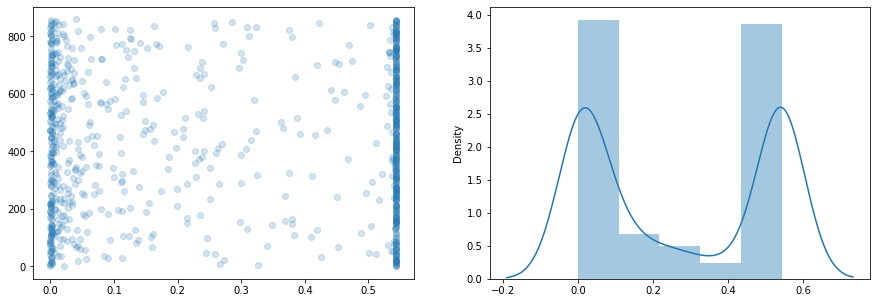

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(predictions, range(0,len(predictions)), alpha=0.2)
ax2=sns.distplot(predictions)

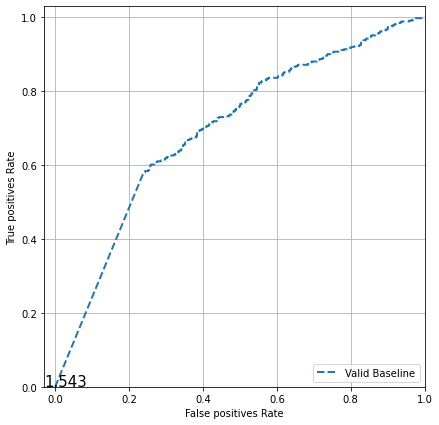

In [14]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.xlabel("False positives Rate")
  plt.ylabel("True positives Rate")
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.grid(True)
  thresholdsLength = len(thresholds)
  thresholds_every = 1000
  colorMap = plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15})

    ax=plt.gca()
    ax.set_aspect('equal')

mpl.rcParams['figure.figsize'] = (7,7)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Valid Baseline", valid_olid_labels, valid_olid_predict, color=colors[0], linestyle="--")
plt.legend(loc='lower right')

In [15]:
cutoff=0.5
test_olid_data['pred_sentiment'] = predictions
test_olid_data['pred_sentiment'] = np.where((test_olid_data.pred_sentiment >= cutoff), 1, test_olid_data.pred_sentiment)
test_olid_data['pred_sentiment'] = np.where((test_olid_data.pred_sentiment < cutoff), 0, test_olid_data.pred_sentiment)


labels= [0, 1]
print(classification_report(test_olid_data['labels'].tolist(), test_olid_data['pred_sentiment'].tolist(), labels=labels))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75       620
           1       0.44      0.63      0.52       240

    accuracy                           0.67       860
   macro avg       0.63      0.66      0.63       860
weighted avg       0.72      0.67      0.68       860



In [16]:
test_olid_data

,id,text,labels,pred_sentiment
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1,1.0
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0,0.0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0,1.0
3,13876,#Watching #Boomer getting the news that she is...,0,0.0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1,1.0
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,1,0.0
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,0,0.0
857,67018,3 people just unfollowed me for talking about ...,1,1.0
858,50665,#WednesdayWisdom Antifa calls the right fascis...,0,1.0


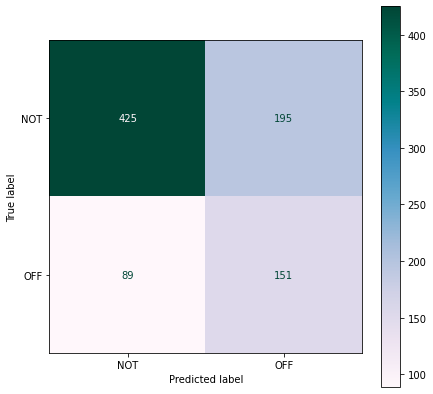

In [17]:
ConfusionMatrixDisplay.from_predictions(y_true=test_olid_data['labels'].tolist(), y_pred=test_olid_data['pred_sentiment'].tolist(), cmap='PuBuGn', display_labels=['NOT', 'OFF'])

**HASOC DATASET**

In [4]:
test_olid_data = pd.read_csv("/content/drive/MyDrive/SubjectivityMining3/Subjectivity_mining_assignment_3_4_data/olid-test.csv")

train_hasoc_data.reset_index(drop=True, inplace=True)
test_olid_data.reset_index(drop=True, inplace=True)

In [5]:
X_train_hasoc, X_valid_hasoc, y_train_hasoc, y_valid_hasoc = train_test_split(train_hasoc_data['text'].tolist(),
                                                      train_hasoc_data['labels'].tolist(),
                                                      test_size=0.2,
                                                      stratify=train_hasoc_data['labels'].tolist(),
                                                      random_state=0)

In [6]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train_hasoc)

In [7]:
X_train_hasoc = np.array(tokenizer.texts_to_sequences(X_train_hasoc))
X_valid_hasoc = np.array(tokenizer.texts_to_sequences(X_valid_hasoc))
X_test = np.array(tokenizer.texts_to_sequences(test_olid_data['text'].tolist()))

maxlen = 50
X_train_hasoc = pad_sequences(X_train_hasoc, padding='post', maxlen=maxlen)
X_valid_hasoc = pad_sequences(X_valid_hasoc, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

train_hasoc_labels = np.asarray(y_train_hasoc)
valid_hasoc_labels = np.asarray(y_valid_hasoc)
test_labels = np.asarray(test_olid_data['labels'].tolist())

print('Train data len:'+str(len(X_train_hasoc)))
print('Class distribution:'+str(Counter(train_hasoc_labels)))

print('Validation data len:'+str(len(X_valid_hasoc)))
print('Class distribution:'+str(Counter(valid_hasoc_labels)))

print('Test data len:'+str(len(X_test)))
print('Class distribution:'+str(Counter(test_labels)))

train_hasoc_ds = tf.data.Dataset.from_tensor_slices((X_train_hasoc, train_hasoc_labels))
valid_hasoc_ds = tf.data.Dataset.from_tensor_slices((X_valid_hasoc, valid_hasoc_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify

Train data len:4681
Class distribution:Counter({0: 2872, 1: 1809})
Validation data len:1171
Class distribution:Counter({0: 719, 1: 452})
Test data len:860
Class distribution:Counter({0: 620, 1: 240})


In [8]:
count = 0
print('===== TRAIN HASOC DATASET ======')
for value, label in train_hasoc_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

count = 0
print('===== VALIDATION DATASET ======')
for value, label in valid_hasoc_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

count = 0
print('===== TEST DATASET ======')
for value, label in test_ds:
  count += 1
  print(value, label)
  if count == 1:
    break

===== TRAIN HASOC DATASET ======
tf.Tensor(
[  44   31  857 6531 6532   70   45 6533 1159   91  423    8 1072 2264
 1960   50 3285   93   39    7 1961  585  858  147  226    5  508  208
    8  159 3286 6534 6535 6536 3287 3287 6537 3288    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
===== VALIDATION DATASET ======
tf.Tensor(
[ 536  268  684  173  857   94  371   25   32  874   33 4759   35  156
  331    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(1, shape=(), dtype=int64)
===== TEST DATASET ======
tf.Tensor(
[ 1358   116   370  6895  6117   408  3708  3437   280   823 14061     6
   367  2350 15865  5936  1066     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   

In [9]:
max_features = 50000
embedding_dim = 16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, embeddings_regularizer = regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[tf.keras.metrics.BinaryAccuracy()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800016    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 50, 16)            2112      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               410112    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [10]:
epochs = 50

history = model.fit(train_hasoc_ds.batch(1024), epochs=epochs, validation_data=valid_hasoc_ds.batch(1024), verbose=1)

Epoch 1/50
5/5 [==============================] - 7s 296ms/step - loss: 4.4833 - binary_accuracy: 0.5631 - val_loss: 3.8342 - val_binary_accuracy: 0.6140
Epoch 2/50
5/5 [==============================] - 1s 225ms/step - loss: 3.5268 - binary_accuracy: 0.6135 - val_loss: 3.0060 - val_binary_accuracy: 0.6140
Epoch 3/50
5/5 [==============================] - 1s 232ms/step - loss: 2.7730 - binary_accuracy: 0.6127 - val_loss: 2.3738 - val_binary_accuracy: 0.6140
Epoch 4/50
5/5 [==============================] - 1s 228ms/step - loss: 2.1952 - binary_accuracy: 0.6135 - val_loss: 1.8968 - val_binary_accuracy: 0.6140
Epoch 5/50
5/5 [==============================] - 1s 208ms/step - loss: 1.7648 - binary_accuracy: 0.6135 - val_loss: 1.5450 - val_binary_accuracy: 0.6140
Epoch 6/50
5/5 [==============================] - 1s 224ms/step - loss: 1.4566 - binary_accuracy: 0.6135 - val_loss: 1.2962 - val_binary_accuracy: 0.6140
Epoch 7/50
5/5 [==============================] - 1s 219ms/step - loss: 1.23

In [11]:
valid_hasoc_predict = model.predict(X_valid_hasoc)
print(valid_hasoc_predict[:10])

37/37 [==============================] - 1s 15ms/step
[[7.5042784e-01]
 [9.9721032e-01]
 [1.3593156e-04]
 [9.5626807e-01]
 [1.6446353e-05]
 [6.9010064e-02]
 [4.2462843e-03]
 [3.3219138e-01]
 [2.4679112e-03]
 [8.7472895e-04]]


In [12]:
X_test = np.array(tokenizer.texts_to_sequences(test_olid_data['text'].tolist()))
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

predictions=model.predict(X_test)

 9/27 [=========>....................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


27/27 [==============================] - 0s 16ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


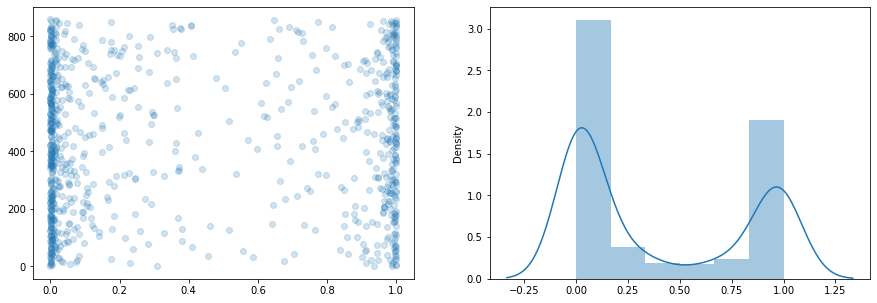

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(predictions, range(0,len(predictions)), alpha=0.2)
ax2=sns.distplot(predictions)

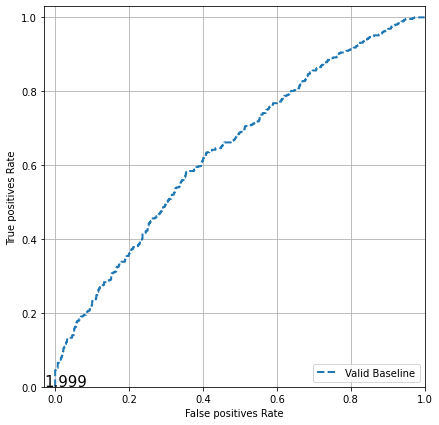

In [14]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.xlabel("False positives Rate")
  plt.ylabel("True positives Rate")
  plt.xlim([-0.03, 1.0])
  plt.ylim([0.0, 1.03])
  plt.grid(True)
  thresholdsLength = len(thresholds)
  thresholds_every = 1000
  colorMap = plt.get_cmap('jet', thresholdsLength)
  for i in range(0, thresholdsLength, thresholds_every):
    threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
    plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15})

    ax=plt.gca()
    ax.set_aspect('equal')

mpl.rcParams['figure.figsize'] = (7,7)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Valid Baseline", valid_hasoc_labels, valid_hasoc_predict, color=colors[0], linestyle="--")
plt.legend(loc='lower right')

In [15]:
cutoff=0.4
test_olid_data['pred_sentiment'] = predictions
test_olid_data['pred_sentiment'] = np.where((test_olid_data.pred_sentiment >= cutoff), 1, test_olid_data.pred_sentiment)
test_olid_data['pred_sentiment'] = np.where((test_olid_data.pred_sentiment < cutoff), 0, test_olid_data.pred_sentiment)


labels= [0, 1]
print(classification_report(test_olid_data['labels'].tolist(), test_olid_data['pred_sentiment'].tolist(), labels=labels))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       620
           1       0.33      0.47      0.39       240

    accuracy                           0.59       860
   macro avg       0.55      0.55      0.54       860
weighted avg       0.64      0.59      0.61       860



In [30]:
test_olid_data

,id,text,labels,pred_sentiment
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1,0.0
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0,0.0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0,0.0
3,13876,#Watching #Boomer getting the news that she is...,0,0.0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1,0.0
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,1,0.0
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,0,0.0
857,67018,3 people just unfollowed me for talking about ...,1,0.0
858,50665,#WednesdayWisdom Antifa calls the right fascis...,0,0.0


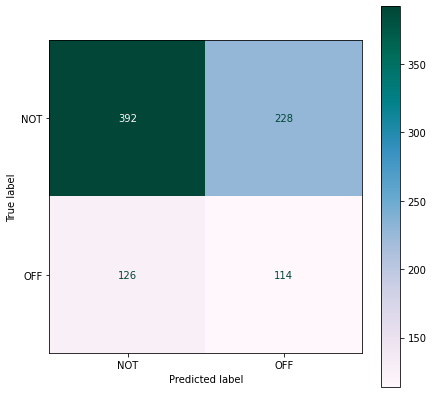

In [16]:
ConfusionMatrixDisplay.from_predictions(y_true=test_olid_data['labels'].tolist(), y_pred=test_olid_data['pred_sentiment'].tolist(), cmap='PuBuGn', display_labels=['NOT', 'OFF'])